# Importing the data and Libraries

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Observing the data and checking out null values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Decision Tree

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

val_scores = []
depths = range(1, 11)

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    val_scores.append(val_acc)

best_depth = depths[np.argmax(val_scores)]
print(f"Best max_depth = {best_depth} with validation accuracy = {max(val_scores):.2f}")

Best max_depth = 10 with validation accuracy = 0.98


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

Accuracy:0.975609756097561


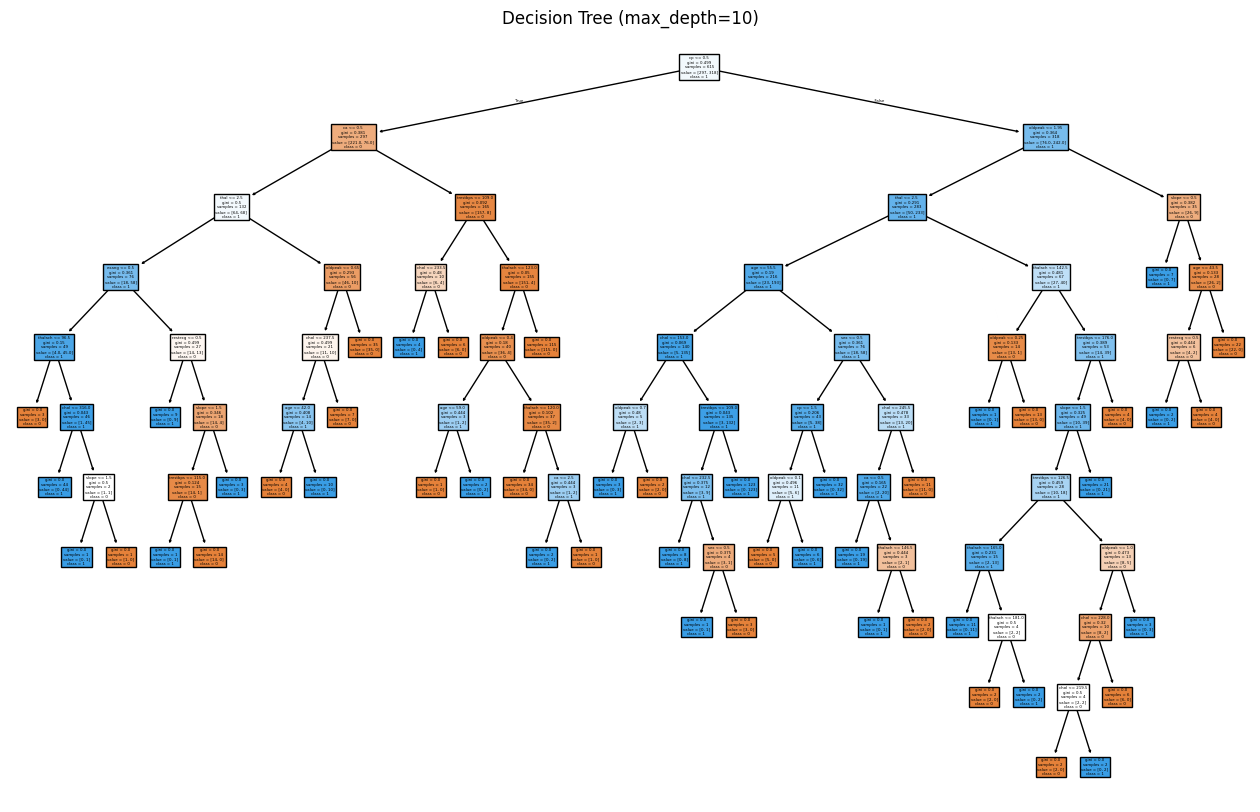

In [12]:
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)

y_pred=dt_best.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
plt.figure(figsize=(16, 10))
plot_tree(dt_best, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)])
plt.title(f"Decision Tree (max_depth={best_depth})")
plt.show()

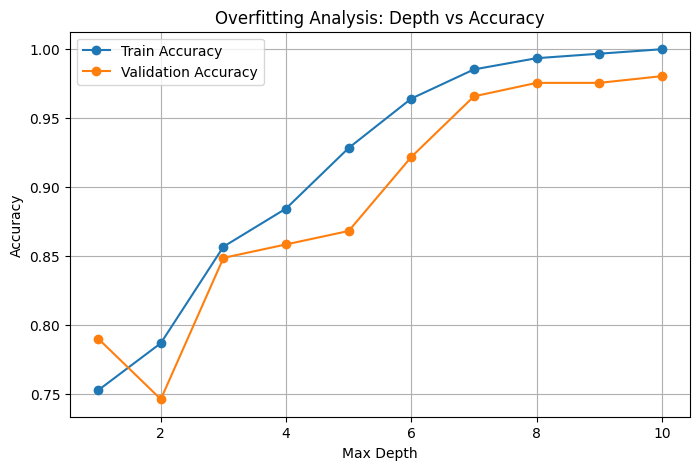

In [ ]:
train_scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    val_acc = accuracy_score(y_val, dt.predict(X_val))
    
    train_scores.append(train_acc)
    val_scores[d - 1] = val_acc

plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

Best max_depth for Random Forest = 8 with validation accuracy = 0.995


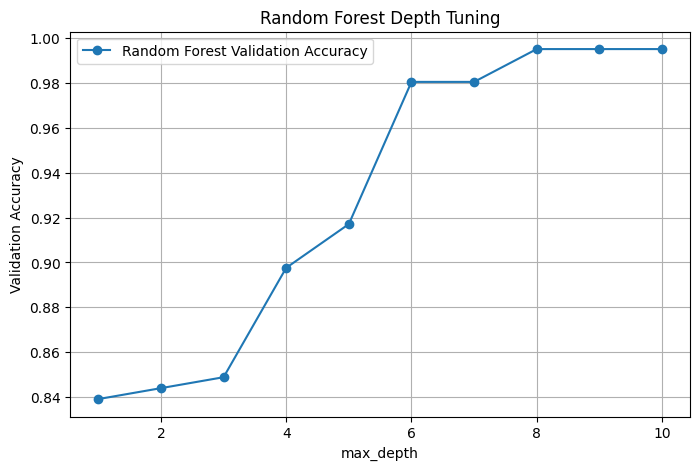

In [13]:
val_scores_rf = []
depths = range(1, 11)

for d in depths:
    rf = RandomForestClassifier(max_depth=d, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    val_scores_rf.append(val_acc)

best_depth_rf = depths[np.argmax(val_scores_rf)]
print(f"Best max_depth for Random Forest = {best_depth_rf} with validation accuracy = {max(val_scores_rf):.3f}")

plt.figure(figsize=(8,5))
plt.plot(depths, val_scores_rf, marker='o', label='Random Forest Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.title('Random Forest Depth Tuning')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
rf_best = RandomForestClassifier(max_depth=best_depth_rf, n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)

rf_val_acc = accuracy_score(y_test, rf_best.predict(X_test))
print(f"Validation accuracy with best Random Forest: {rf_val_acc:.3f}")


Validation accuracy with best Random Forest: 0.990


# Feature Importance

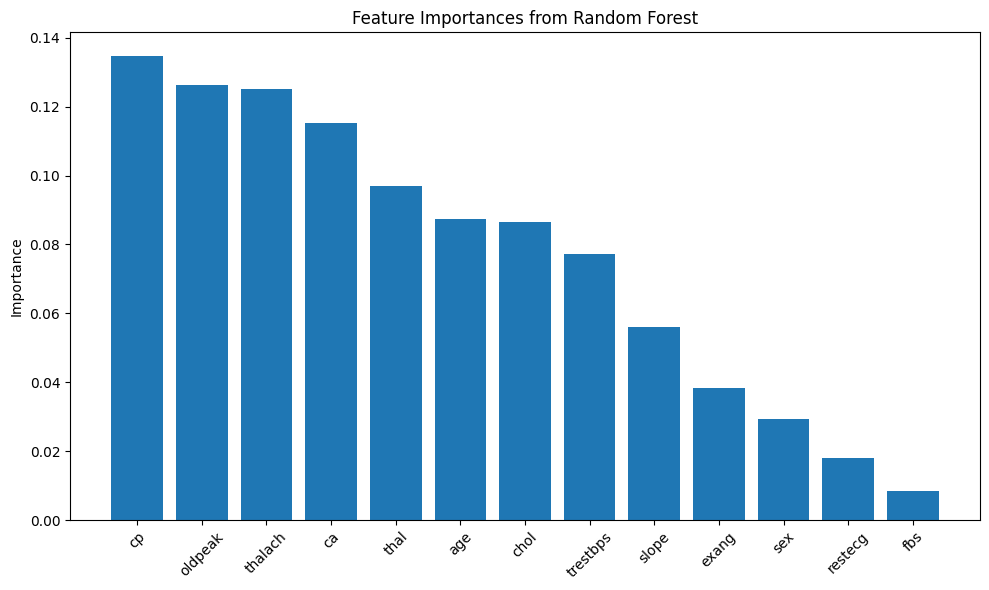

In [16]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [17]:
dt_scores = cross_val_score(dt_best, X, y, cv=5) 
rf_scores = cross_val_score(rf_best, X, y, cv=5)

print(f"Decision Tree Cross-Validation Accuracy: {np.mean(dt_scores):.3f} ± {np.std(dt_scores):.3f}")
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_scores):.3f} ± {np.std(rf_scores):.3f}")


Decision Tree Cross-Validation Accuracy: 1.000 ± 0.000
Random Forest Cross-Validation Accuracy: 0.992 ± 0.010
